<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-signal" data-toc-modified-id="Load-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load signal</a></span></li><li><span><a href="#Compute-sharpness-of-the-whole-signal" data-toc-modified-id="Compute-sharpness-of-the-whole-signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute sharpness of the whole signal</a></span></li><li><span><a href="#Compute-sharpness-per-signal-segments" data-toc-modified-id="Compute-sharpness-per-signal-segments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute sharpness per signal segments</a></span></li><li><span><a href="#Compute-sharpness-from-loudness" data-toc-modified-id="Compute-sharpness-from-loudness-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute sharpness from loudness</a></span></li><li><span><a href="#Compute-sharpness-from-spectrum" data-toc-modified-id="Compute-sharpness-from-spectrum-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compute sharpness from spectrum</a></span></li></ul></div>


# How to compute acoustic Sharpness according to DIN method 
This tutorial explains how to use MOSQITO to compute the acoustic sharpness of a signal according to the DIN 45692 method. For more information on the implementation and validation of the metric, you can refer to the [documentation](../docs/sharpness_din.md).

The following commands are used to import the necessary functions.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import mosqito functions
from mosqito.utils import load
# Import spectrum computation tool
from scipy.fft import fft, fftfreq
from mosqito.sq_metrics import loudness_zwst_perseg
from mosqito.sq_metrics import sharpness_din_st
from mosqito.sq_metrics import sharpness_din_perseg
from mosqito.sq_metrics import sharpness_din_from_loudness
from mosqito.sq_metrics import sharpness_din_freq

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

## Load signal
In this tutorial, the signal is imported from a .wav file. The tutorial [Audio signal basic operations](./tuto_signal_basic_operations.ipynb) gives more information about the syntax of the import and the other supported file types. You can use any .wav file to perform the tutorial or you can download the [pink noise signal](../validations/sq_metrics/loudness_zwst/input/ISO_532-1/Test%20signal%205%20%28pinknoise%2060%20dB%29.wav) from MOSQITO that is used in the following.

<IPython.core.display.Javascript object>


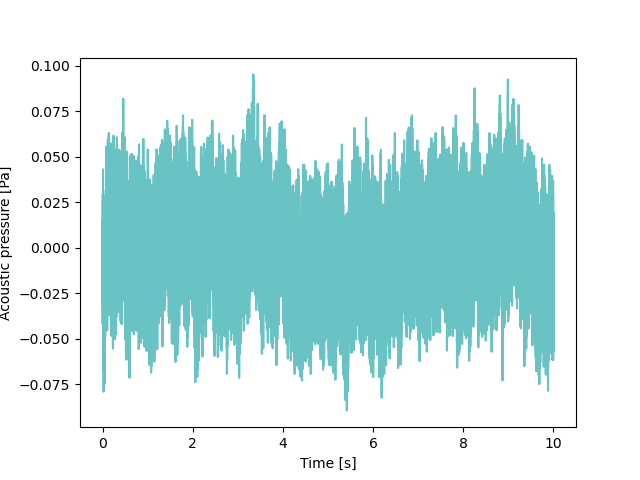

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [2]:
# Define path to the .wav file
# To be replaced by your own path
path = "../validations/sq_metrics/loudness_zwst/input/ISO_532_1/Test signal 5 (pinknoise 60 dB).wav"
# load signal
sig, fs = load(path, wav_calib=2 * 2 **0.5)
# plot signal
t = np.linspace(0, (len(sig) - 1) / fs, len(sig))
plt.figure(1)
plt.plot(t, sig, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

## Compute sharpness of the whole signal
The acoustic sharpness is computed by using the following command line. In addition to the signal (as ndarray) and the sampling frequency, the function takes 1 input arguments: "weitghting" to specify the weighting functions to be used ('din' by default, 'aures', 'bismarck' or 'fastl').

In [3]:
sharpness = sharpness_din_st(sig, fs, weighting="din")

The function return the Sharpness of the signal :

In [4]:
print("Sharpness = {:.1f} acum".format(sharpness) )

Sharpness = 2.0 acum


## Compute sharpness per signal segments
To compute the sharpness for successive, possibly overlaping, time segments, you can use the sharpness_din_perseg function. It accepts two more input paramters:
- nperseg: to define the length of each segment
- noverlap: to define the number of points to overlap between segments

<IPython.core.display.Javascript object>


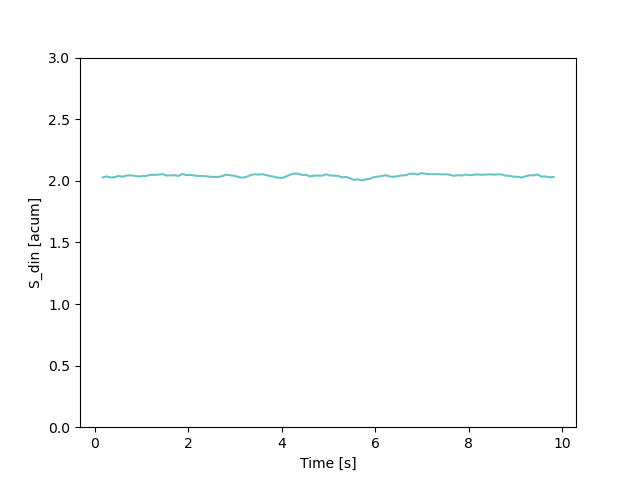

(0.0, 3.0)

In [5]:
sharpness, time_axis = sharpness_din_perseg(sig, fs, nperseg=8192 * 2, noverlap=4096, weighting="din")
plt.figure(2)
plt.plot(time_axis, sharpness, color=COLORS[0])
plt.xlabel("Time [s]")
plt.ylabel("S_din [acum]")
plt.ylim((0, 3))

## Compute sharpness from loudness
In case you have already computed the loudness of a signal, you can use the sharpness_din_from_loudness function to compute the sharpnes. It takes the loudness and the specific loudness as input. The loudness can be computed per time segment or not.

<IPython.core.display.Javascript object>


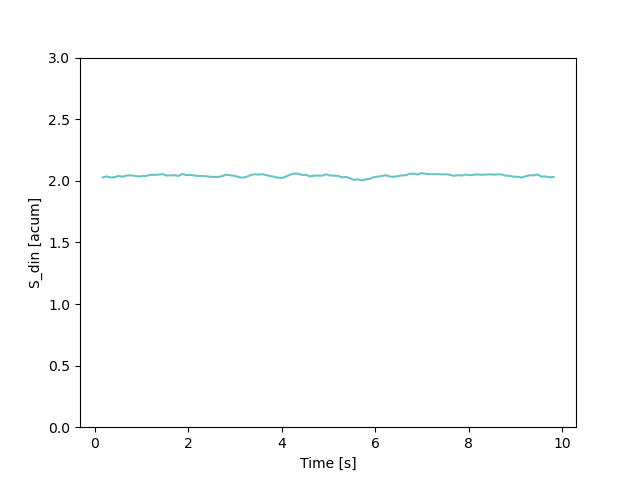

(0.0, 3.0)

In [6]:
N, N_specific, bark_axis, time_axis = loudness_zwst_perseg(
    sig, fs, nperseg=8192 * 2, noverlap=4096
)
sharpness = sharpness_din_from_loudness(N, N_specific, weighting='din')
plt.figure(3)
plt.plot(time_axis, sharpness, color=COLORS[0])
plt.xlabel("Time [s]")
plt.ylabel("S_din [acum]")
plt.ylim((0, 3))

## Compute sharpness from spectrum
The commands below shows how to compute the stationary sharpness from a frequency spectrum either in complex values or amplitude values using the functions from MOSQITO. One should note that only stationary values can be computed from a frequency input. 

The input spectrum can be either 1D with size (Nfrequency) or 2D with size (fNrequency x Ntime). The corresponding time axis can be either the same for all the spectra, with size (Nfrequency) or different for each spectrum with size (Nfrequency x Ntime).

One should pay attention that the input spectrum must be in RMS values !

In [7]:
# Compute spectrum
n = len(sig)
spec = np.abs(2 / np.sqrt(2) / n * fft(sig)[0:n//2])
freqs = fftfreq(n, 1/fs)[0:n//2]
# Compute sharpness
S = sharpness_din_freq(spec, freqs)

print("Sharpness_din = {:.1f} sone".format(S) )

Sharpness_din = 2.0 sone


---

In [8]:
from datetime import date
print("Tutorial generation date:", date.today().strftime("%B %d, %Y"))

Tutorial generation date: March 30, 2022
